<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(1_2)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_1.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_1.2_n20.csv',
 'data_multi_delta_1.2_n30.csv',
 'data_multi_delta_1.2_n60.csv',
 'data_multi_delta_1.2_n120.csv',
 'data_multi_delta_1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.2_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,34.648748,30.677440,-1.953534,73.372655,77.728482,-4.355828
1,0.0,1.0,44.202932,56.944018,12.450113,123.597062,108.638003,14.959060
2,0.0,2.0,41.462639,22.311902,7.380209,81.154750,77.064439,4.090310
3,0.0,3.0,99.266975,63.990155,-24.323385,148.933745,165.827106,-16.893360
4,0.0,4.0,57.454979,29.992733,-15.222258,82.225454,98.395542,-16.170088
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,34.840447,48.900388,-3.336177,90.404657,98.081380,-7.676723
29996,999.0,26.0,83.242181,46.977344,-11.547913,128.671611,140.920818,-12.249207
29997,999.0,27.0,52.055347,90.975044,-12.309015,140.721375,155.517146,-14.795771
29998,999.0,28.0,46.818508,85.351471,20.668029,162.838007,145.126781,17.711226


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,34.648748,30.677440,-1.953534,73.372655,77.728482,-4.355828
1,0.0,1.0,44.202932,56.944018,12.450113,123.597062,108.638003,14.959060
2,0.0,2.0,41.462639,22.311902,7.380209,81.154750,77.064439,4.090310
3,0.0,3.0,99.266975,63.990155,-24.323385,148.933745,165.827106,-16.893360
4,0.0,4.0,57.454979,29.992733,-15.222258,82.225454,98.395542,-16.170088
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,34.840447,48.900388,-3.336177,90.404657,98.081380,-7.676723
29996,999.0,26.0,83.242181,46.977344,-11.547913,128.671611,140.920818,-12.249207
29997,999.0,27.0,52.055347,90.975044,-12.309015,140.721375,155.517146,-14.795771
29998,999.0,28.0,46.818508,85.351471,20.668029,162.838007,145.126781,17.711226


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    34.648748  30.677440  -1.953534   73.372655   77.728482   
      1.0    44.202932  56.944018  12.450113  123.597062  108.638003   
      2.0    41.462639  22.311902   7.380209   81.154750   77.064439   
      3.0    99.266975  63.990155 -24.323385  148.933745  165.827106   
      4.0    57.454979  29.992733 -15.222258   82.225454   98.395542   
...                ...        ...        ...         ...         ...   
999.0 25.0   34.840447  48.900388  -3.336177   90.404657   98.081380   
      26.0   83.242181  46.977344 -11.547913  128.671611  140.920818   
      27.0   52.055347  90.975044 -12.309015  140.721375  155.517146   
      28.0   46.818508  85.351471  20.668029  162.838007  145.126781   
      29.0   55.818680  71.962920   5.561028  143.342628  140.232182   

                 e_hat  
rep   index             
0.0   0.0    -4.355828  
      1.0    14.959060  
      2.0     4.090310  
      3.0   -16.893360  
      4.0   -16.170088  
...                ...  
999.0 25.0   -7.676723  
      26.0  -12.249207  
      27.0  -14.795771  
      28.0   17.711226  
      29.0    3.110445  

[30000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    34.648748  30.677440  -1.953534   73.372655   77.728482   
      1.0    44.202932  56.944018  12.450113  123.597062  108.638003   
      2.0    41.462639  22.311902   7.380209   81.154750   77.064439   
      3.0    99.266975  63.990155 -24.323385  148.933745  165.827106   
      4.0    57.454979  29.992733 -15.222258   82.225454   98.395542   
...                ...        ...        ...         ...         ...   
999.0 25.0   34.840447  48.900388  -3.336177   90.404657   98.081380   
      26.0   83.242181  46.977344 -11.547913  128.671611  140.920818   
      27.0   52.055347  90.975044 -12.309015  140.721375  155.517146   
      28.0   46.818508  85.351471  20.668029  162.838007  145.126781   
      29.0   55.818680  71.962920   5.561028  143.342628  140.232182   

                 e_hat  
rep   index             
0.0   0.0    -4.355828  
      1.0    14.959060  
      2.0     4.090310  
      3.0   -16.893360  
      4.0   -16.170088  
...                ...  
999.0 25.0   -7.676723  
      26.0  -12.249207  
      27.0  -14.795771  
      28.0   17.711226  
      29.0    3.110445  

[30000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,34.648748,30.677440,-1.953534,73.372655,77.728482,-4.355828
1,0.0,1.0,44.202932,56.944018,12.450113,123.597062,108.638003,14.959060
2,0.0,2.0,41.462639,22.311902,7.380209,81.154750,77.064439,4.090310
3,0.0,3.0,99.266975,63.990155,-24.323385,148.933745,165.827106,-16.893360
4,0.0,4.0,57.454979,29.992733,-15.222258,82.225454,98.395542,-16.170088
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,34.840447,48.900388,-3.336177,90.404657,98.081380,-7.676723
29996,999.0,26.0,83.242181,46.977344,-11.547913,128.671611,140.920818,-12.249207
29997,999.0,27.0,52.055347,90.975044,-12.309015,140.721375,155.517146,-14.795771
29998,999.0,28.0,46.818508,85.351471,20.668029,162.838007,145.126781,17.711226


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    34.648748  30.677440  -1.953534   73.372655   77.728482   
      1.0    44.202932  56.944018  12.450113  123.597062  108.638003   
      2.0    41.462639  22.311902   7.380209   81.154750   77.064439   
      3.0    99.266975  63.990155 -24.323385  148.933745  165.827106   
      4.0    57.454979  29.992733 -15.222258   82.225454   98.395542   
...                ...        ...        ...         ...         ...   
999.0 25.0   34.840447  48.900388  -3.336177   90.404657   98.081380   
      26.0   83.242181  46.977344 -11.547913  128.671611  140.920818   
      27.0   52.055347  90.975044 -12.309015  140.721375  155.517146   
      28.0   46.818508  85.351471  20.668029  162.838007  145.126781   
      29.0   55.818680  71.962920   5.561028  143.342628  140.232182   

                 e_hat  
rep   index             
0.0   0.0    -4.355828  
      1.0    14.959060  
      2.0     4.090310  
      3.0   -16.893360  
      4.0   -16.170088  
...                ...  
999.0 25.0   -7.676723  
      26.0  -12.249207  
      27.0  -14.795771  
      28.0   17.711226  
      29.0    3.110445  

[30000 rows x 6 columns]

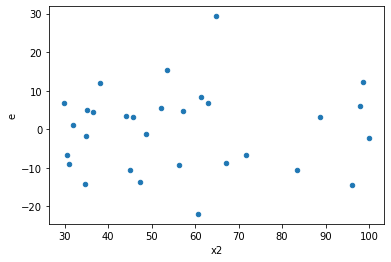

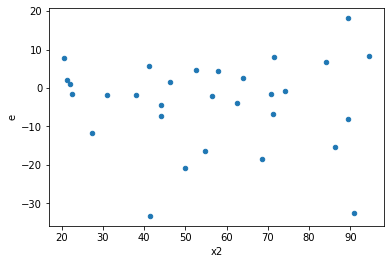

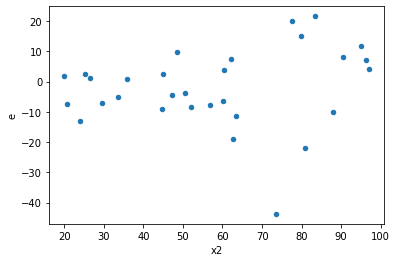

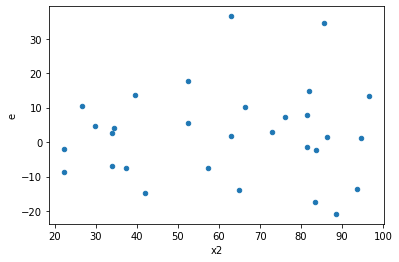

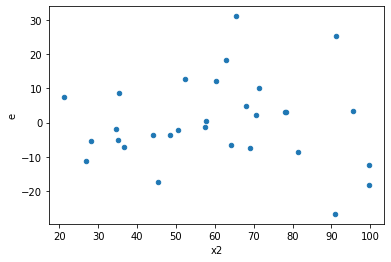

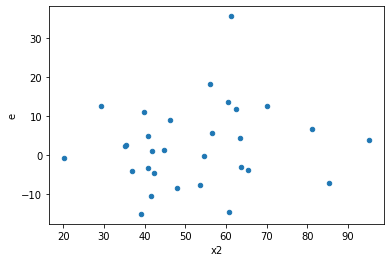

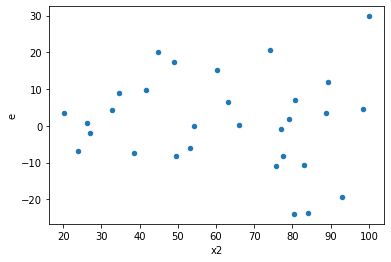

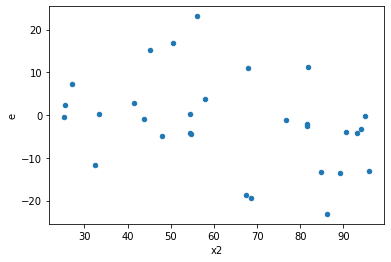

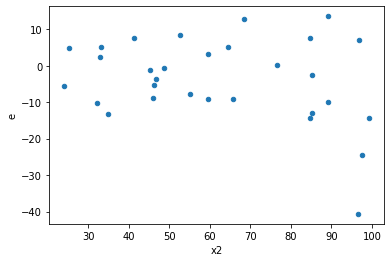

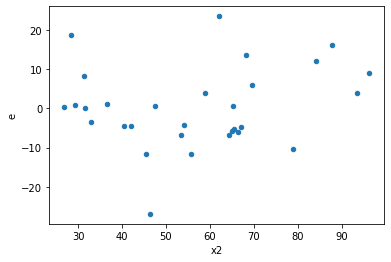

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,10.0,10.0,1058.4631114908098,1319.3593806370923,105.84631114908098,131.93593806370922,1.24648593447798,0.7342717627436912,0.6328641186281544,0.3671358813718456,Reject005=1 : Homoscedasticity
1.0,10.0,10.0,645.9750336959394,1434.1602225365637,64.59750336959394,143.41602225365637,2.2201480672264235,0.2244967238044957,0.8877516380977521,0.11224836190224785,Reject005=1 : Homoscedasticity
2.0,10.0,10.0,734.870587076596,1040.6760662788652,73.4870587076596,104.06760662788652,1.416135146215064,0.5924712419159517,0.7037643790420242,0.29623562095797584,Reject005=1 : Homoscedasticity
3.0,10.0,10.0,373.41593880324535,2152.686959061253,37.34159388032454,215.26869590612532,5.764850225623374,0.010549575872597083,0.9947252120637015,0.005274787936298542,Reject005=0 : Heteroscedasticity
4.0,10.0,10.0,738.7716548916503,1440.3946957427079,73.87716548916504,144.03946957427078,1.9497157020107367,0.3074486513971455,0.8462756743014272,0.15372432569857275,Reject005=1 : Homoscedasticity
5.0,10.0,10.0,989.8897830132321,1590.3843601165004,98.98897830132321,159.03843601165005,1.606627714931412,0.46667237468978273,0.7666638126551086,0.23333618734489137,Reject005=1 : Homoscedasticity
6.0,10.0,10.0,763.6084024656168,818.9922545209793,76.36084024656168,81.89922545209792,1.072529128643076,0.9140188123299375,0.5429905938350312,0.45700940616496877,Reject005=1 : Homoscedasticity
7.0,10.0,10.0,170.0970981662438,2384.805953716674,17.00970981662438,238.48059537166742,14.020262423206612,0.0002624915215754253,0.9998687542392123,0.00013124576078771266,Reject005=0 : Heteroscedasticity
8.0,10.0,10.0,615.1361970923703,898.6889569593886,61.51361970923703,89.86889569593886,1.4609593147132576,0.5599384155104965,0.7200307922447517,0.27996920775524825,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,10.0,1058.4631114908098,1319.3593806370923,105.84631114908098,131.93593806370922,1.24648593447798,0.7342717627436912,Reject005=1 : Homoscedasticity
1.0,10.0,10.0,645.9750336959394,1434.1602225365637,64.59750336959394,143.41602225365637,2.2201480672264235,0.2244967238044957,Reject005=1 : Homoscedasticity
2.0,10.0,10.0,734.870587076596,1040.6760662788652,73.4870587076596,104.06760662788652,1.416135146215064,0.5924712419159517,Reject005=1 : Homoscedasticity
3.0,10.0,10.0,373.41593880324535,2152.686959061253,37.34159388032454,215.26869590612532,5.764850225623374,0.010549575872597083,Reject005=0 : Heteroscedasticity
4.0,10.0,10.0,738.7716548916503,1440.3946957427079,73.87716548916504,144.03946957427078,1.9497157020107367,0.3074486513971455,Reject005=1 : Homoscedasticity
5.0,10.0,10.0,989.8897830132321,1590.3843601165004,98.98897830132321,159.03843601165005,1.606627714931412,0.46667237468978273,Reject005=1 : Homoscedasticity
6.0,10.0,10.0,763.6084024656168,818.9922545209793,76.36084024656168,81.89922545209792,1.072529128643076,0.9140188123299375,Reject005=1 : Homoscedasticity
7.0,10.0,10.0,170.0970981662438,2384.805953716674,17.00970981662438,238.48059537166742,14.020262423206612,0.0002624915215754253,Reject005=0 : Heteroscedasticity
8.0,10.0,10.0,615.1361970923703,898.6889569593886,61.51361970923703,89.86889569593886,1.4609593147132576,0.5599384155104965,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      801
Reject005=0 : Heteroscedasticity    199
Name: Result_test, dtype: int64